# Variance
We seek to understand the variance of the averaged perceptron ensemble, compared to a regular perceptron and voting perceptron ensemble.

In [2]:
from tqdm.notebook import tqdm
import numpy as np
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
from sklearn import svm, metrics, datasets
import warnings
from IPython.display import display, clear_output
import perceptron
import importlib
from addperceptron import AddPerceptron
importlib.reload(perceptron)
from perceptron import Perceptron as EnsembledPerceptron, Loader


# def warn(*args, **kwargs):
#     pass


# warnings.warn = warn

In [3]:
def run_many(num_runs, epochs, title: str, train_path, test_path=None, test_size=None, dataset_name=None):
    # This should make splits in the same way as initializing an `EnsembledPerceptron`
    train_data, test_data = Loader.load(train_path, test_path, test_size)

    scores = []
    fig, ax = plt.subplots()
    display_id = display(fig, display_id=True)

    # outside the loop so it only loads the data once
    ensembled_perceptron = EnsembledPerceptron(trainpath=train_path, testpath=test_path, test_size=test_size, dataset_name=dataset_name)

    for seed in tqdm(range(num_runs)):
        normal_perceptron = Perceptron(max_iter=epochs, random_state=seed)
        normal_perceptron.fit(train_data[0], train_data[1])
        normal_score = normal_perceptron.score(test_data[0], test_data[1])
        # normal_score = metrics.accuracy_score(test_data[1], normal_perceptron.predict(test_data[0]))
        
        # Ensemble implemented with Scikit
        sk_perceptron = AddPerceptron(max_iter=epochs, random_state = seed)
        sk_perceptron.fit(train_data[0], train_data[1])
        sk_score = sk_perceptron.score(test_data[0], test_data[1])

        ensembled_perceptron.train(ensemble_size=epochs, data_opts="window", epoch_size=0.5, log="none")
        ensembled_score = ensembled_perceptron.accuracy
        
        scores.append([normal_score, ensembled_score, sk_score])

        # Update plot live
        ax.clear()
        scores_array = np.array(scores)
        ax.violinplot(scores_array, showmeans=True)
        ax.set_xticks([1, 2, 3])
        ax.set_xticklabels(["Perceptron", "Ensembled", "Ensembled(sk)"])
        ax.set_title(title)
        display_id.update(fig)
        # plt.pause(0.02)

    scores = np.array(scores)
    print(f"Perceptron: {scores[:, 0].mean()} ± {scores[:, 0].std()}")
    print(f"Ensembled: {scores[:, 1].mean()} ± {scores[:, 1].std()}")
    print(f"Ensembled(sk): {scores[:, 2].mean()} ± {scores[:, 2].std()}")
    # plt.ioff()
    # plt.show()

    return scores

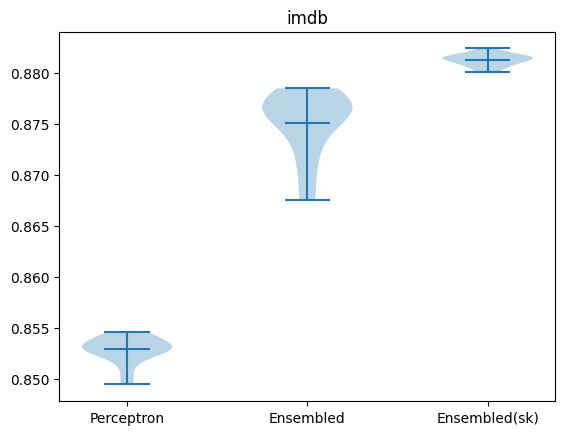

  0%|          | 0/20 [00:00<?, ?it/s]

Perceptron: 0.8528779999999999 ± 0.001258664371466838
Ensembled: 0.875078 ± 0.003118216798107539
Ensembled(sk): 0.8813340000000001 ± 0.0005561690390519766


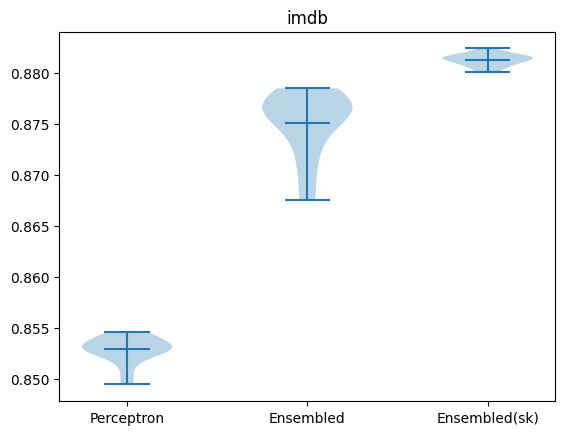

In [6]:
_ = run_many(num_runs=20, epochs=100, title="imdb", train_path="../data/imdb/train_labeledBow.feat", test_path="../data/imdb/test_labeledBow.feat", dataset_name="imdb")

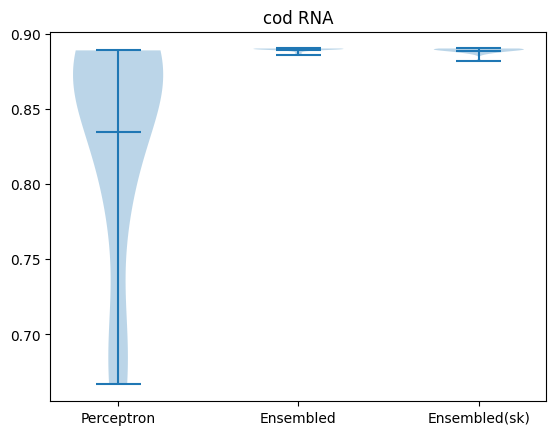

  0%|          | 0/20 [00:00<?, ?it/s]

Perceptron: 0.8346071858536102 ± 0.07118719247422306
Ensembled: 0.889404015 ± 0.0013254143937935048
Ensembled(sk): 0.8888458748900107 ± 0.00190464927113265


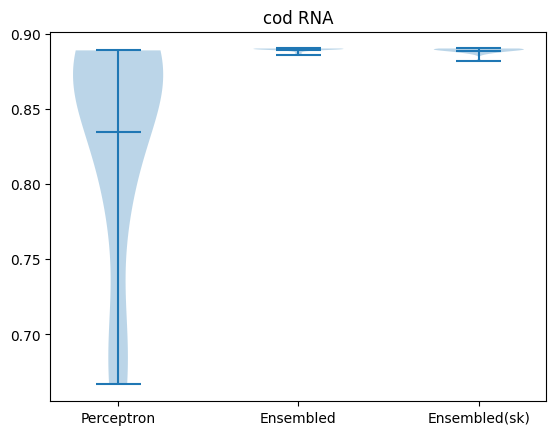

In [7]:
_ = run_many(num_runs=20, epochs=100, title="cod RNA", train_path="../data/cod-rna/train.txt", test_path="../data/cod-rna/test.txt")

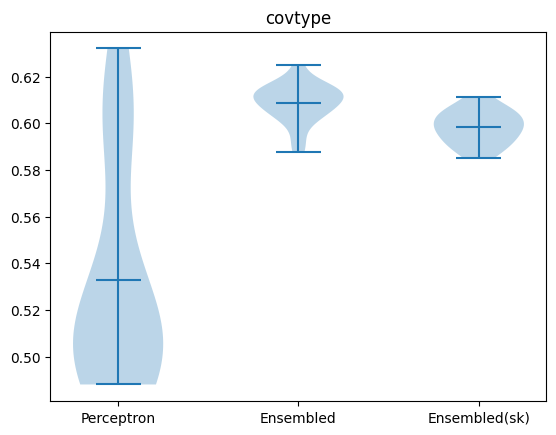

  0%|          | 0/20 [00:00<?, ?it/s]

Perceptron: 0.5328024206040494 ± 0.04587537741325178
Ensembled: 0.608797405 ± 0.008186787904329446
Ensembled(sk): 0.5982568346264794 ± 0.006987950731953864


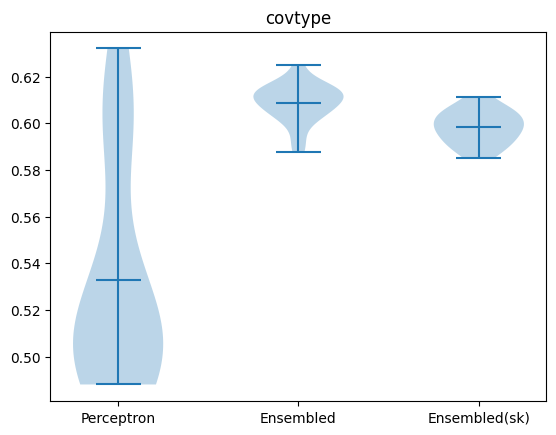

In [8]:
_ = run_many(num_runs=20, epochs=100, title="covtype", train_path="../data/cov/covtype.libsvm.binary")

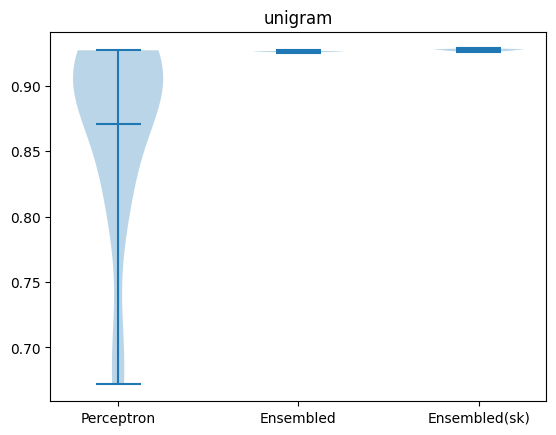

  0%|          | 0/20 [00:00<?, ?it/s]

Perceptron: 0.8706137142857141 ± 0.07160573157768524
Ensembled: 0.9259868650000002 ± 0.00046287461506868446
Ensembled(sk): 0.9271268571428573 ± 0.000687164181433319


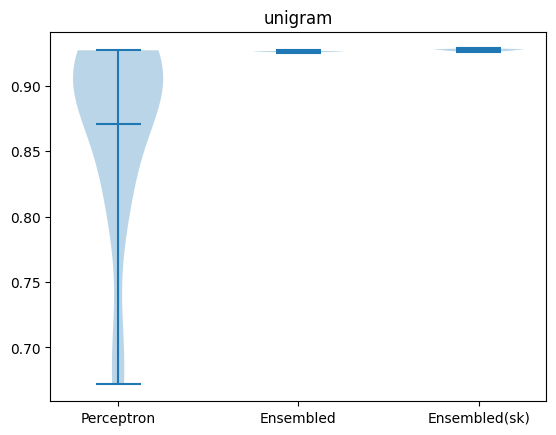

In [9]:
_ = run_many(num_runs=20, epochs=100, title="unigram", train_path="../data/webspam/unigram.svm")

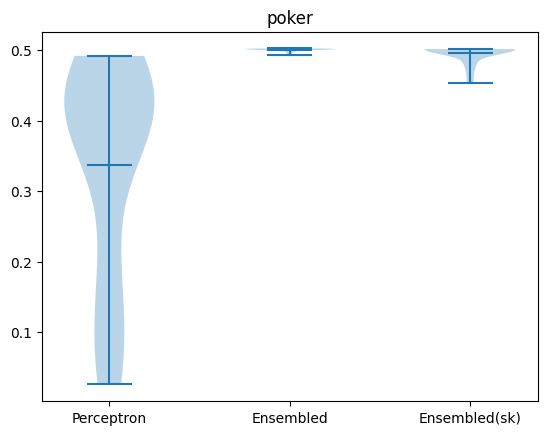

  0%|          | 0/20 [00:00<?, ?it/s]

Perceptron: 0.33670235000000004 ± 0.15023009969053305
Ensembled: 0.5005645000000001 ± 0.0020190215328222743
Ensembled(sk): 0.49517834999999993 ± 0.012850734999504893


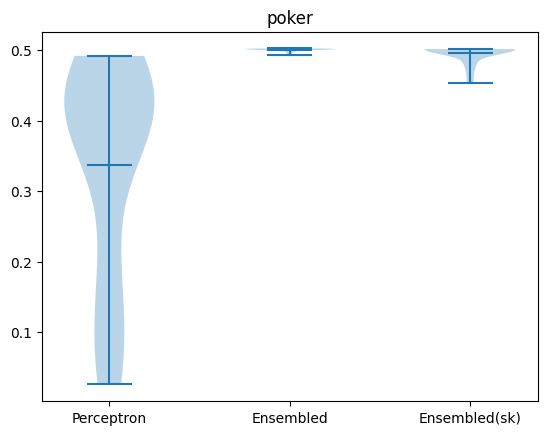

In [15]:
_ = run_many(num_runs=20, epochs=200, title="poker", train_path="../data/poker/poker", test_path="../data/poker/poker.t")